<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
# mnist(60000, ): [3, 1, 4, 5]
# cifar10(50000, 1): [[3], [1], [4], [5]]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
trans = [    
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

horse


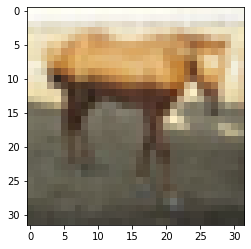

In [20]:
import matplotlib.pyplot as plt
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 一個filter: 3(kh) * 3(kw) * 3(last channel) + 1(bias) = 28. 
    # 28 * 64 = 1792 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    # 一個filter: 3 * 3 * 64 + 1(bias) = 577
    # 128 * 577 = 73856
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 512)        

In [22]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0 

In [24]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar10.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 9s - loss: 1.7214 - accuracy: 0.3563 - val_loss: 1.4235 - val_accuracy: 0.4794
Epoch 2/100
225/225 - 8s - loss: 1.3339 - accuracy: 0.5155 - val_loss: 1.2072 - val_accuracy: 0.5642
Epoch 3/100
225/225 - 8s - loss: 1.1556 - accuracy: 0.5846 - val_loss: 1.0956 - val_accuracy: 0.6094
Epoch 4/100
225/225 - 8s - loss: 1.0142 - accuracy: 0.6390 - val_loss: 1.0344 - val_accuracy: 0.6276
Epoch 5/100
225/225 - 8s - loss: 0.9119 - accuracy: 0.6772 - val_loss: 0.9040 - val_accuracy: 0.6870
Epoch 6/100
225/225 - 8s - loss: 0.8291 - accuracy: 0.7099 - val_loss: 0.8106 - val_accuracy: 0.7178
Epoch 7/100
225/225 - 8s - loss: 0.7542 - accuracy: 0.7355 - val_loss: 0.7446 - val_accuracy: 0.7410
Epoch 8/100
225/225 - 8s - loss: 0.6977 - accuracy: 0.7550 - val_loss: 0.7447 - val_accuracy: 0.7428
Epoch 9/100
225/225 - 8s - loss: 0.6461 - accuracy: 0.7742 - val_loss: 0.7340 - val_accuracy: 0.7452
Epoch 10/100
225/225 - 8s - loss: 0.6004 - accuracy: 0.7896 - val_loss: 0.6891 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test)

In [ ]:
proba = model.predict(x_test_norm)
pre = proba.argmax(axis=1)
print(pre.shape)
print(y_test.shape)
y_test_1d = y_test.reshape(10000)
print(y_test_1d.shape)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# tf: predict -> sklearn: predict_proba
# axis: 0(縱) 1(橫)
mat = confusion_matrix(y_test_1d, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(trans[i]) for i in range(10)],
             columns=["{}(預測)".format(trans[i]) for i in range(10)])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_1d)[0]
idx = idx[:200]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test_1d[idx]

plt.figure(figsize=(15, 45))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])